## Overview
*Diffusion models are trained to denoise random Gaussian noise step-by-step to generate a sample of interest, such as an image or audio.*

## Install all the necessary libraries


In [ ]:
!pip install diffusers["torch",'flax'] transformers

## Checkthe backend device

* Default is CPU
* Default GPU in Kaggle container's environment
* Default mps in macOS

In [1]:
import os, platform

torch_device = 'cpu'

if 'kaggle' in os.environ.get('KAGGLE_URL_BASE','localhost'):
    torch_device = 'cuda'
else:
    torch_device = 'mps' if platform.system() == 'Darwin' else 'cpu'

In [2]:
torch_device

'mps'

### Enable using CPU if mps has not been support in some processing units

In [3]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

## Load the model with from_pretrained() method

Models are initiated with the `from_pretrained()` method which also locally caches the model weight, so it is faster the next time you load the model.

In [4]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


The DiffusionPipline `downloads and caches all modeling`, `tokenization`, and `scheduling components`.

* **Pipelines(The DiffusionPipline)** is a `high-level` and end-to-end class designed to rapidly generate samples from pretrained diffusion models for interence.
* **Models(The pretained model)** architectures and modules that can be used as building blocks for creating diffusion systems.
* **Scheduler(Scheduling components)** algorithms that control how noise is added for training, and how to genrate denoised images during inference.

In [5]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.17.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Swapping schedulers(if needed)

Different schedulers come with different denoising speeds and quality trade-offs. The best way to find out which one works best for you is to try them out. Below shows how to switch between schedulers

In [6]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

### Runnin pipline on GPU

*mps for macOS local environment*

We move the generator object to a GPU/mps device below

In [7]:
pipeline.to(torch_device)

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.17.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### Generating a image
Passing a text tprompt to the pipeline to generate an image, and then access the denoised image. By default, the image output is wrapped in a PIL.Image object.

  0%|          | 0/50 [00:00<?, ?it/s]

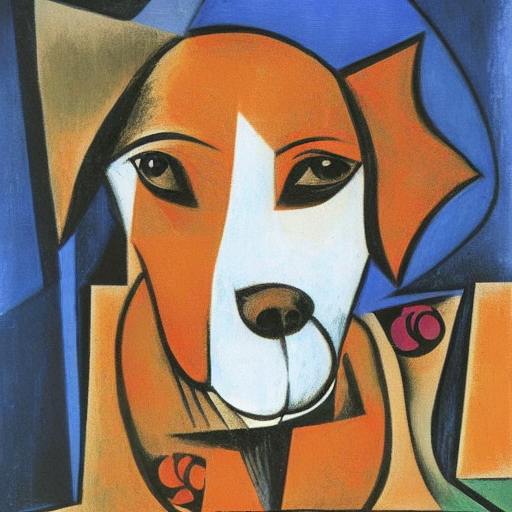

In [8]:
image = pipeline("An image of a dog in Picasso style").images[0]
image

### Save the image to a file


In [ ]:
image.save("image_of_squirrel_painting.png")